In [6]:
import numpy as np
import pandas as pd
import cPickle as pkl
from matplotlib import pyplot as plt
import time
import linearcorex

# Load and process data

In [7]:
with open('../data/EOD_day.pkl', 'rb') as f:
    day_df = pd.DataFrame(pkl.load(f))

print("Data.shape = {}".format(day_df.shape))

df_2010 = day_df[day_df.index >= '2010-01-01']
df_2010 = df_2010[df_2010.index <= '2012-01-01']  # NOTE: 2 years
df_2010 = df_2010[['AAPL', 'MSFT', 'AMZN', 'INTC', 'BA', 'FDX']]
#df_2010 = df_2010.loc[:, list(np.max(np.array(df_2010), axis=0)<1)]

X = []
for i in range(1, 365//7 - 2):
    week_start = 5 * i
    week_end = 5 * (i + 1)
    X.append(df_2010[week_start : week_end])  # two weeks
print [len(x) for x in X]

Data.shape = (4277, 5038)
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


# Train

In [8]:
single_corex = []
for t in range(len(X)):
    print("training corex {} / {}".format(t+1, len(X)))
    C = linearcorex.Corex(n_hidden=3,
                          max_iter=300,
                          verbose=True)
    C.fit(X[t])
    single_corex.append(C)

training corex 1 / 49
Linear CorEx with 3 latent factors
196 iterations to tol: 0.000010
59 iterations to tol: 0.000010
129 iterations to tol: 0.000010
31 iterations to tol: 0.000010
21 iterations to tol: 0.000010
6 iterations to tol: 0.000010
1 iterations to tol: 0.000010
training corex 2 / 49
Linear CorEx with 3 latent factors
44 iterations to tol: 0.000010
10 iterations to tol: 0.000010
13 iterations to tol: 0.000010
20 iterations to tol: 0.000010
31 iterations to tol: 0.000010
22 iterations to tol: 0.000010
33 iterations to tol: 0.000010
training corex 3 / 49
Linear CorEx with 3 latent factors
202 iterations to tol: 0.000010
93 iterations to tol: 0.000010
145 iterations to tol: 0.000010
37 iterations to tol: 0.000010
17 iterations to tol: 0.000010
21 iterations to tol: 0.000010
14 iterations to tol: 0.000010
training corex 4 / 49
Linear CorEx with 3 latent factors
30 iterations to tol: 0.000010
166 iterations to tol: 0.000010
21 iterations to tol: 0.000010
46 iterations to tol: 0.0

130 iterations to tol: 0.000010
47 iterations to tol: 0.000010
36 iterations to tol: 0.000010
57 iterations to tol: 0.000010
48 iterations to tol: 0.000010
43 iterations to tol: 0.000010
training corex 28 / 49
Linear CorEx with 3 latent factors
199 iterations to tol: 0.000010
143 iterations to tol: 0.000010
69 iterations to tol: 0.000010
18 iterations to tol: 0.000010
33 iterations to tol: 0.000010
26 iterations to tol: 0.000010
6 iterations to tol: 0.000010
training corex 29 / 49
Linear CorEx with 3 latent factors
223 iterations to tol: 0.000010
113 iterations to tol: 0.000010
47 iterations to tol: 0.000010
78 iterations to tol: 0.000010
39 iterations to tol: 0.000010
12 iterations to tol: 0.000010
16 iterations to tol: 0.000010
training corex 30 / 49
Linear CorEx with 3 latent factors
208 iterations to tol: 0.000010
104 iterations to tol: 0.000010
109 iterations to tol: 0.000010
23 iterations to tol: 0.000010
13 iterations to tol: 0.000010
11 iterations to tol: 0.000010
4 iterations 

In [9]:
print np.sum([c.tc for c in single_corex if not np.isnan(c.tc)])

180.721858263


# Print statistics

In [10]:
single_covs = [c.get_covariance() for c in single_corex]
covs_diff = [np.square(single_covs[t+1] - single_covs[t]).sum() for t in range(len(X) - 1)]

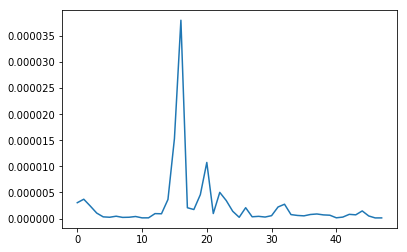

In [11]:
plt.plot(covs_diff)
plt.show()

In [13]:
X[15]

ticker,AAPL,MSFT,AMZN,INTC,BA,FDX
date,,,,,,
2010-04-29,0.026911,0.003009,0.017079,0.009888,0.019621,0.019155
2010-04-30,-0.028105,-0.015095,-0.032668,-0.027671,-0.018431,-0.027760
2010-05-03,0.020146,0.010644,0.002845,0.018389,0.027061,0.027330
2010-05-04,-0.028797,-0.023655,-0.055713,-0.030095,-0.021508,-0.033524
2010-05-05,-0.010418,-0.009293,0.008473,-0.010195,-0.018821,-0.009063


In [14]:
stocks = ['AAPL', 'MSFT', 'AMZN', 'INTC', 'BA', 'FDX']
indices = [list(df_2010.columns).index(x) for x in stocks]

In [15]:
for c in single_corex:
    print np.array(c.mis).argmax(axis=0)[indices]

[0 0 0 0 0 1]
[0 0 0 0 0 0]
[0 0 1 2 2 1]
[0 0 0 0 1 1]
[1 0 2 1 0 0]
[0 0 0 0 0 2]
[0 0 1 0 1 0]
[0 1 2 0 0 1]
[0 0 0 1 0 0]
[1 1 0 1 0 0]
[0 0 0 1 2 1]
[0 0 1 1 2 2]
[0 1 1 0 1 0]
[0 2 0 1 0 1]
[0 1 1 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[1 1 0 2 0 2]
[0 1 1 0 0 0]
[2 0 0 0 0 0]
[0 0 0 0 0 0]
[2 0 1 1 0 2]
[1 2 1 1 0 0]
[1 0 0 1 0 0]
[0 0 1 0 1 1]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[2 0 0 0 1 0]
[0 0 1 0 0 1]
[0 1 0 1 0 0]
[0 0 0 0 0 0]
[0 0 0 0 1 1]
[0 0 0 0 0 0]
[0 1 0 1 0 0]
[0 0 0 0 2 1]
[1 0 0 0 0 0]
[2 0 0 0 1 1]
[0 0 0 0 0 0]
[0 1 0 1 0 1]
[0 0 1 0 0 0]
[1 0 0 1 2 0]
[1 1 0 0 0 0]
[0 2 1 0 1 2]
[0 0 0 1 0 0]
[0 0 0 0 0 0]
[0 0 1 0 0 0]
[1 0 0 0 2 0]
[0 1 0 0 0 2]
[2 0 1 0 0 0]


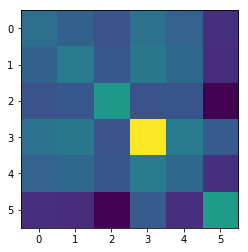

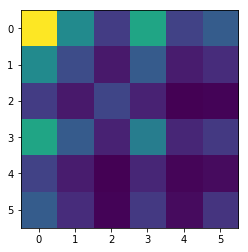

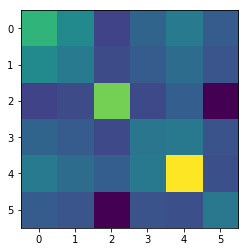

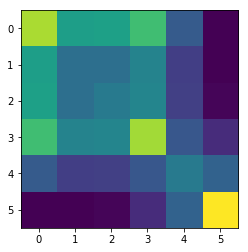

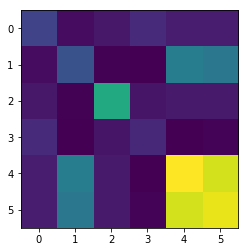

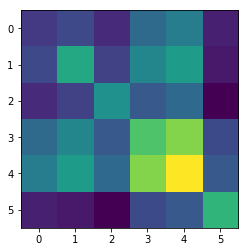

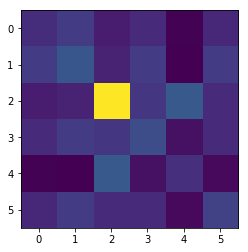

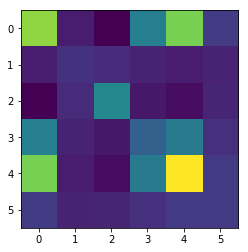

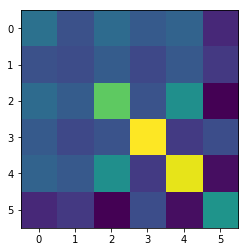

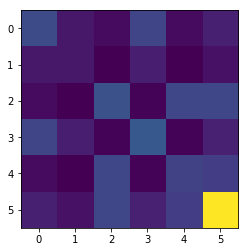

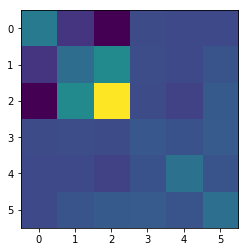

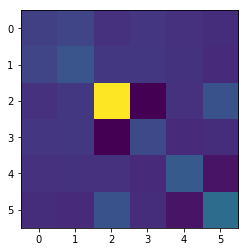

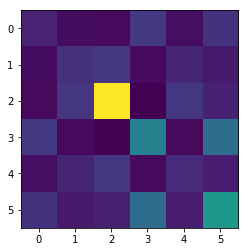

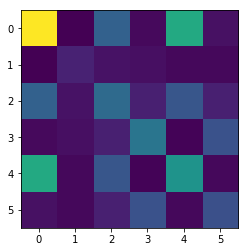

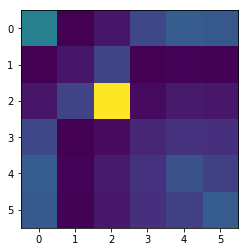

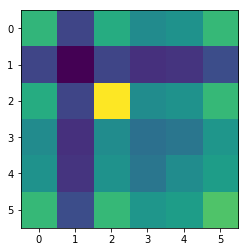

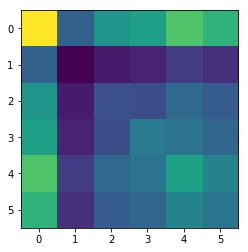

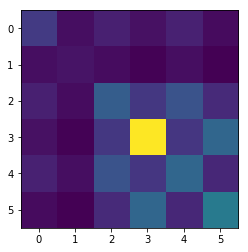

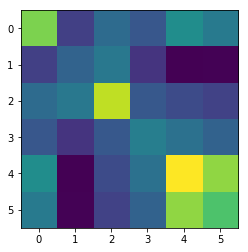

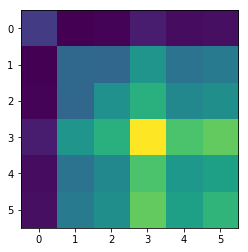

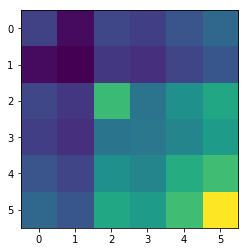

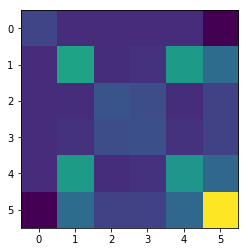

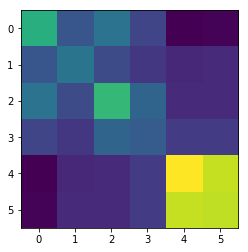

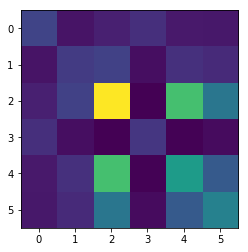

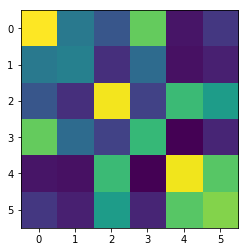

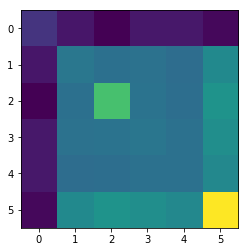

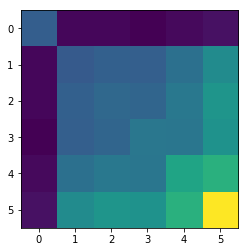

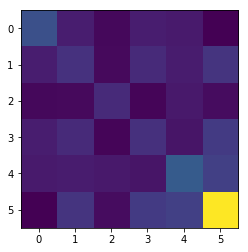

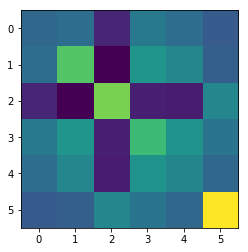

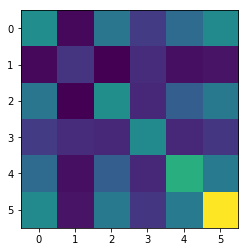

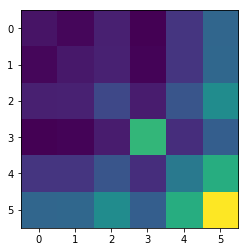

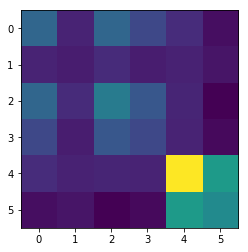

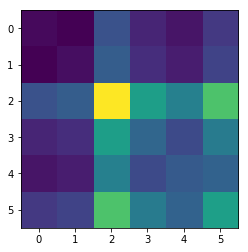

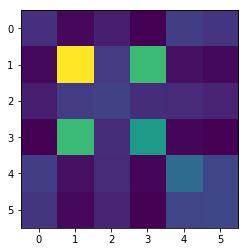

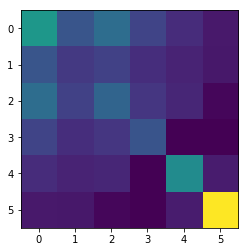

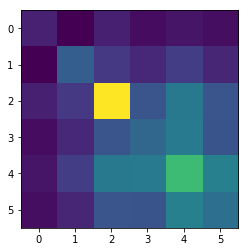

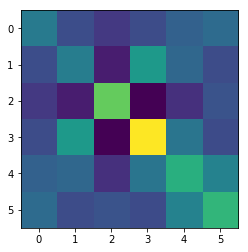

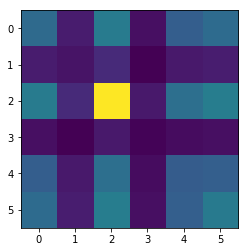

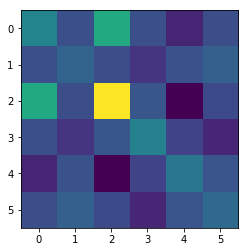

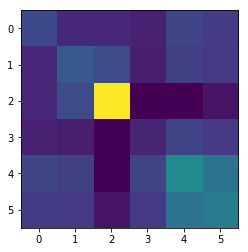

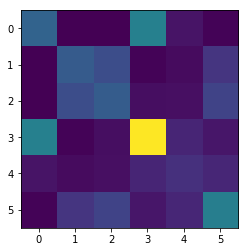

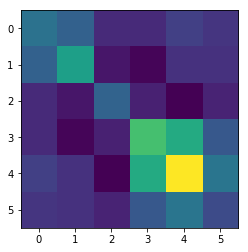

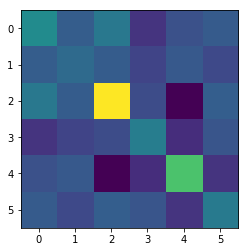

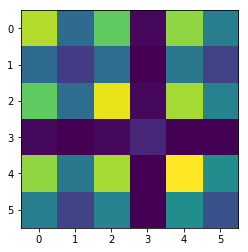

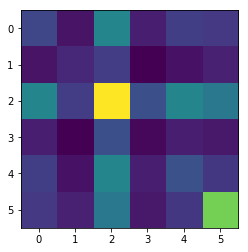

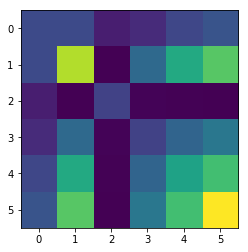

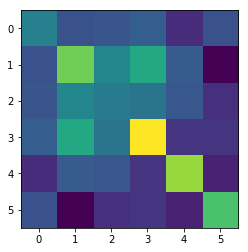

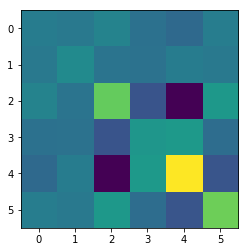

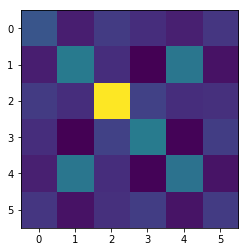

In [16]:
for cov in single_covs:
    plt.imshow(cov)
    plt.show()

## apple MI with hidden factors over the time

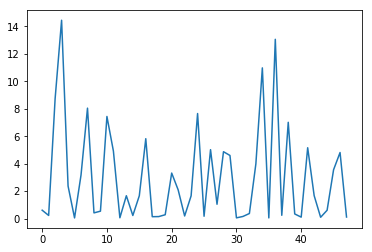

In [17]:
apple = indices[0]
mis = []
for t in range(len(X)):
    mis.append(single_corex[t].mis[:, apple])
    
mis_diff = [np.square(mis[t+1] - mis[t]).sum() for t in range(len(X)-1)]

plt.plot(mis_diff)
plt.show()

In [18]:
for i in range(len(mis_diff)):
    if mis_diff[i] > 5:
        print X[i].index[3], " - ", X[i+1].index[3]

2010-01-29 00:00:00  -  2010-02-05 00:00:00
2010-02-05 00:00:00  -  2010-02-12 00:00:00
2010-03-08 00:00:00  -  2010-03-15 00:00:00
2010-03-29 00:00:00  -  2010-04-06 00:00:00
2010-05-11 00:00:00  -  2010-05-18 00:00:00
2010-07-08 00:00:00  -  2010-07-15 00:00:00
2010-07-22 00:00:00  -  2010-07-29 00:00:00
2010-09-17 00:00:00  -  2010-09-24 00:00:00
2010-10-01 00:00:00  -  2010-10-08 00:00:00
2010-10-15 00:00:00  -  2010-10-22 00:00:00
2010-11-05 00:00:00  -  2010-11-12 00:00:00


In [19]:


X[35]

ticker,AAPL,MSFT,AMZN,INTC,BA,FDX
date,,,,,,
2010-09-21,0.001907,-0.011011,-0.003799,0.011088,0.008004,0.008684
2010-09-22,0.014025,-0.021471,0.007298,-0.006792,-0.005138,0.008011
2010-09-23,0.004066,-0.007314,0.006718,-0.001578,-0.019562,-0.019454
2010-09-24,0.011768,0.014122,0.051554,0.023314,0.031125,0.018993
2010-09-27,-0.003955,-0.001715,-0.008461,-0.009654,-0.010991,-0.001900


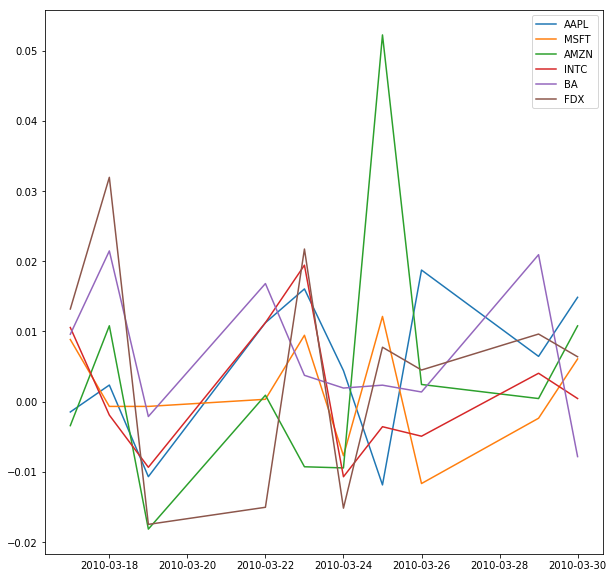

In [24]:
plt.figure(figsize=(10, 10))

for s in stocks:
    plt.plot(df_2010[s][50:60])

plt.legend(stocks)
plt.show()